In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Диаграмма Вороного

## План конспекта
- [Определение](#definition)
- [Свойства](#properties)
- [Связь с триангуляцией Делоне](#delone)
- [Инкрементальный алгоритм построения диаграммы Вороного](#incremental_algorithm)
- [Диаграмма Вороного высшего порядка](#higher-order)
- [Алгоритм построения диаграммы Вороного высшего порядка](#higher-order_algorithm)
- [Полезные материалы и визуализаторы](#usefull_links)

<a id='definition'></a>
## Определение диаграммы Вороного

### Описание
Диаграмма Вороного (англ. Voronoi diagram) конечного множества точек $P$ на плоскости представляет такое разбиение плоскости, при котором каждая область этого разбиения образует множество точек, более близких к одному из элементов множества $P$, чем к любому другому элементу множества.
Названа в честь российского учёного Георгия Феодосьевича Вороного. Также известна как: мозаика Вороного, разбиение Вороного, разбиение Дирихле.

### Формальное определение
Пусть $\mathcal{S} = \{ S_1, S_2, ..., S_n\}$ — множество различных непересекающихся ***сайтов***.

> $S \in \mathcal{S}$ называется ***сайтом*** и является либо закрытым отрезком $t$, либо точкой $p$. Внутренность отрезка $t$ обозначается как $t^{\circ}$ и называется ***открытым отрезком***. Внутренностью точки является пустое множество.

В данном конспекте будет рассматриваться случай, когда все сайты имеют не более одной общей точки. Но в конце будет показано как обобщить идею и на такие случаи.

> Два сайта называются ***слабо-пересекающимися***, если их общая точка не лежит во внутренности одного из отрезков.

> Два сайта называются ***сильно-пересекающимися***, если их общая точка лежит во внутренности одного из отрезков.

> Расстоянием от точки $x \in \mathbb{E}^2$ до сайта $S_i$ называется величина $\delta(x, S_i) = \min{\lVert x - y \rVert : y \in S_i}$.

Пусть $H_{ij} = \{ x \in \mathbb{E}^2 : \delta(x, S_i) \leqslant \delta(x, S_j) \}$. Тогда бисектор $\pi_{ij}$ сайтов
$S_i$ и $S_j$ (т.е. геометрическое место точек равноудаленных от $S_i$ и $S_j$) — это множество точек $H_i \cap H_j$.

> ***Клетка Вороного*** $V(S_i)$ — множество точек из $\mathbb{E}^2$, которые находятся ближе (или на таком же) к $S_i$ расстоянии чем к любому другому сайту $S_j \in \mathcal{S}$. Т.е. $V(S_i) = \bigcap\limits_{i!=j} H_{ij}$

> Связанное множество точек, принадлежащее пересечению ровно двух клеток Вороного называется ***ребром Вороного***, тогда как точки принадлежащие как минимум трем клеткам Вороного называются ***вершинами Вороного***.

> Разбиением плоскости на вершины, ребра и клетки Вороного называется ***диаграммой Вороного*** $\mathcal{V}(\mathcal{S})$ множества сайтов $\mathcal{S}$. Множество вершин и ребер Вороного называют 1-каркасом $\mathcal{V}_1(\mathcal{S})$ множества сайтов $\mathcal{S}$.

Так как $\mathcal{S}$ содержит только непересекающиеся сайты, то бисекторы могут быть только отрезками, лучами или параболами. (TODO: можно или разобрать тут все случаи и вставить картинки, либо оставить это как упражнение читателю)

Если же сайты могут быть слабо-пересекающимися, то бисекторы $\pi_{ij}$ могут приобрести гораздо более сложную форму. Чтобы этого избежать, принято использовать следующую стандартную технику: будем представлять отрезки не как единый целый объект, а как три различных (две точки и открытый отрезок). Для того чтобы определить диграмму Вороного для этой модификации $\mathcal{S}$ нам нужно определить бисектор между открытым отрезком $t^{\circ}_i$ и его концом $p_j$. В этом случае бисектором $\pi_{ij}$ для $p_j$ и $t^{\circ}_i$ будет называться перепендикуляр к $t^{\circ}_i$ проведённый через точек $p_j$. Тогда множество $H_{ij}$ — это закрытая полуплоскость ограниченная $\pi_{ij}$.

## Алгоритм для построения диаграммы Вороного второго порядка

Далее будет описан алгоритм построения диаграммы Вороного для пересекающихся сайтов. Для начала опишем алгоритм для слабо-пересекающихся сайтов, а потом обобщим его до поддержки сильно-пересекающихся сайтов. Далее под $\mathcal{S}$ будет пониматься множество сайтов уже вставленное в диаграмму Вороного и под $S$ будет пониматься новый сайт который нужно вставить.

### Алгоритм для слабо-пересекающихся сайтов
Процедура вставки будет состоять из следующих четырех шагов:
1. Найти первый конфликт сайта $S$ с каркасом Вороного $\mathcal{V}_1(\mathcal{S})$
2. Найти весь регион конфликта сайта $S$ с $\mathcal{V}_1(\mathcal{S})$
3. Построить диаграмму Вороного $\mathcal{V}(\mathcal{S} \cup \{S\})$
4. Обновить структуру данных для поиска

На данный момент опустим определение и обсуждение структуры данных для поиска и запросов на ближайшего соседа.

Опишем процедуру вставки в случае когда $S$ — это вершина $p$.
Для начала необходимо найти ближайший сайт $N_{\mathcal{S}}(p)$ для $p$ среди всех сайтов $\mathcal{S}$ (если таких несколько, то можно выбрать любой). Как только $N_{\mathcal{S}}(p)$ будет найдено может произойти один из следующих сценариев:
* Если $N_{\mathcal{S}}(p)$ это точка и $p$ это та же самая точка, то делать ничего не надо: эта точка уже есть в диаграмме
* Иначе $p$ находится в конфликте с одним из ребер на границе $V(N_{\mathcal{S}}(p))$. Таким образом, первый шаг вставки завершается рассмотрением всех ребер в клетке $V(N_{\mathcal{S}}(p))$ и возвратом того, что конфликтует с $p$.

Второй шаг процедуры вставки опирается на тот факт, что конфликтующий регион $\mathcal{R}_{\mathcal{S}}(p)$ точки $p$ является связанным подмножеством $\mathcal{V}_1(\mathcal{S})$ (возможно через ребра на границе клетки находящейся на бесконечном расстоянии TODO: возможно тому кто не видел никогда такую идею будет не понятно, нужно пояснить). Итак, после предыдущего шага возможны всего две ситуации конфликта $p$ с ребром Вороного $e$:
* $p$ находится в конфликте с как минимум одним из концов $e$. Необходимо найти весь оставшийся регион конфликта. Запустим \emph{DFS} на каркасе Вороного пока все ребра находящиеся в конфликте с $p$ не будут найдены. TODO: наверное нужно описать чуть подробнее, но скорее всего просто сопутствующего кода хватит
* $p$ находится в конфликте со связанным подмножеством внутренности $e$. Получается мы уже полностью нашли регион конфликта $p$ с диаграммой $\mathcal{V}(\mathcal{S})$.

В конце второго шага мы обнаружили весь конфликтующий регион $\mathcal{R}_{\mathcal{S}}(p)$, и в частности его границу $\delta\mathcal{R}_{\mathcal{S}}(p)$. На шаге три мы просто восстановим клетку Вороного для $S$ используя эту конфликтующую границу.

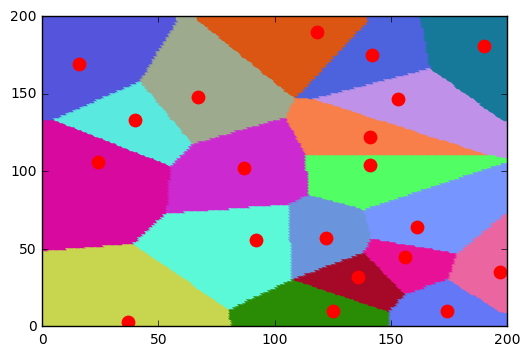

In [3]:
import random
import math

#Примитивный алгоритм. Принимает на вход ширину диаграммы, высоту диаграммы и количество точек.
#Создаёт случайную диаграмму Вороного для данного количества точек.

def generate_voronoi_diagram(width, height, num_cells):
    imgx, imgy = width, height
    nx = []
    ny = []
    nr = []
    ng = []
    nb = []
    for i in range(num_cells):
        nx.append(random.randrange(imgx))
        ny.append(random.randrange(imgy))
        nr.append(random.random())
        ng.append(random.random())
        nb.append(random.random())
    for y in range(imgy):
        for x in range(imgx):
            dmin = math.hypot(imgx-1, imgy-1)
            j = -1
            for i in range(num_cells):
                d = math.hypot(nx[i]-x, ny[i]-y)
                if d < dmin:
                    dmin = d
                    j = i
            plt.scatter(x, y, color = (nr[j], ng[j], nb[j]), s = 20)
    for i in range(num_cells):
        plt.scatter(nx[i], ny[i], color = 'r', s = 80)
    plt.axis([0, width, 0, height])
    plt.show()
    
generate_voronoi_diagram(200, 200, 20)

<a id='properties'></a>
## Свойства диаграммы Вороного

### Связь с пересечением полуплоскостей
Возьмём две точки плоскости: $p$ и $q$. Проведём серединный перпендикуляр к отрезку $pq$; полученную полуплоскость, которая содержит в себе $p$, обозначим $h(p, q)$, другую — $h(q, p)$. Заметим, что для точки $r$ выполняется $r \in h(p, q)$ тогда и только тогда, когда $\rho(r, p) < \rho(r, q)$. Отсюда вытекает следующее утверждение:

**Утверждение**<br>
>$\mathcal{V}(p_i) = \bigcap\limits_{1 \leqslant j \leqslant n, j \neq i} h(p_i, p_j)$

Отсюда получаем, что ячейка Вороного — это пересечение $n - 1$ полуплоскостей, и поэтому представляет собой (возможно, неограниченную) открытую выпуклую область с не более чем $n - 1$ вершинами и $n - 1$ рёбрами.

### Топология диаграммы Вороного
**Теорема**<br>
>Пусть $P$ — множество из $n$ сайтов. Если они все лежат на одной прямой, то $Vor(P)$ представляет собой $n - 1$ параллельную прямую. Иначе $Vor(P)$ связная и все её рёбра — либо отрезки, либо лучи.

$\triangleright$
<img src="Voronoi-not-lines.png" width=200 height=600 style="float: right; margin: 10px;" />
<div style="padding-left:40px">
В случае, если все сайты лежат на одной прямой, каждая пара соседних сайтов порождает серединный перпендикуляр к отрезку, содержащему их, и, соответственно, к прямой, которая содержит все сайты. Так получаются $n - 1$ прямая, каждая из которых перпендикулярна прямой, содержащей сайты, а значит, эти прямые параллельны.

Рассмотрим теперь случай, когда сайты не лежат на одной прямой. Покажем, что рёбра — это отрезки или лучи, от противного. Предположим, что есть ребро $e$, являющееся прямой. Пусть оно — граница ячеек $\mathcal{V}(p_i)$ и $\mathcal{V}(p_j)$. Пусть точка $p_k \in P$ не лежит на прямой $p_i p_j$ (по условию такая точка существует). Тогда серединный перпендикуляр к $p_j p_k$ не параллелен $e$, и, значит, он его пересекает. Но тогда та часть $e$, что лежит в $h(p_k, p_j)$, не может быть границей $\mathcal{V}(p_j)$, потому что она ближе к $p_k$, чем к $p_j$. Пришли к противоречию.

<img src="Voronoi-connected.png" width=400 height=500 style="float: right; margin: 10px;"/>
Докажем теперь, что диаграмма связна. Предположим, что это не так. Тогда на её рёбрах найдутся две точки $s$ и $t$, между которыми нет пути по рёбрам диаграммы. Рассмотрим отрезок $st$. Он пересекает некоторое количество ячеек диаграммы. Пусть он пересекает какую-то ячейку в точках $a$ и $b$. От точки $a$ до точки $b$ можно добраться по рёбрам тогда и только тогда, когда ячейка связна. Раз пути из $s$ в $t$ нет, то какая-то из ячеек, пересекаемых отрезком $st$, несвязная. Это возможно, только если она представляет собой полосу, ограниченную двумя параллельными прямыми. Но в нашем случае в диаграмме не может быть прямых, пришли к противоречию.
</div>
$\triangleleft$

### Размер структуры
**Теорема**<br>
>Для $n \geqslant 3$ сайтов диаграмма Вороного содержит не больше $2n - 5$ вершин и $ 3n - 6$ рёбер.

$\triangleright$
<img src="Voronoi-infinite-vertex.png" width=250 height=300 style="float: right; margin: 10px;"/>
<div style="padding-left:40px">
Для случая сайтов, лежащих на одной прямой, утверждение напрямую следует из вида диаграммы для этого случая, поэтому рассмотрим общий случай. По формуле Эйлера $v - e + f = 2$, где $v$ — число вершин, $e$ — число рёбер и $f$ — число граней связного планарного графа. Мы не можем сразу применить эту формулу к $Vor(P)$, потому что в этом графе есть полубесконечные рёбра. Поэтому добавим вершину $v_\infty$, и все полубесконечные рёбра мы превратим в рёбра, инцидентные ей. Таким образом мы увеличили число вершин на одну, а число рёбер не изменилось. Число граней равно $n$ по определению диаграммы Вороного. Тогда по формуле Эйлера получаем $(v + 1) - e + n = 2$.

Сумма степеней всех вершин полученного графа равна $2e$, так как у каждого ребра есть ровно два конца (нет петель). Также из каждой вершины исходят как минимум три ребра. Отсюда получаем $2e \geqslant 3 (v + 1)$.

Домножим равенство на два и вычтем из него полученную нижнюю границу для $2 \cdot e$, в результате получим $ v \leqslant 2n - 5$. Далее подставим этот результат в равенство и получим $e \leqslant 3n - 6$, что и требовалось доказать.
</div>
$\triangleleft$

<a id='delone'></a>
## Связь с триангуляцией Делоне

**Определение (Наибольшая пустая окружность)**<br>
>***Наибольшая пустая окружность*** точки $q$ по отношению к $P$ (***largest empty circle*** of $q$ with respect to $P$, $C_P(q)$) — наибольшая окружность с центром в $q$ такая, что во внутренности соответствующего ей круга не лежит ни одного сайта из $P$.

**Лемма**<br>
>Точка $q$ — вершина диаграммы Вороного в том и только в том случае, когда $C_P(q)$ содержит три и более сайтов на своей границе.

$\triangleright$
<div style="padding-left:40px">
Предположим, что $q$ существует, а $p_i, \ p_j, \ p_k$ — соответствующие точки. Так как внутри $C_P(q)$ нет других сайтов, а $q$ равноудалена от точек $p_i, \ p_j, \ p_k$, $q$ должна быть на границе $\mathcal{V}(p_i), \ \mathcal{V}(p_j), \ \mathcal{V}(p_k)$ одновременно, то есть вершиной диаграммы.
Докажем в другую сторону: каждая вершина $q$ диаграммы инцидентна минимум трём рёбрам, и, поэтому, как минимум трём ячейкам $\mathcal{V}(p_i), \ \mathcal{V}(p_j), \ \mathcal{V}(p_k)$. Тогда $q$ лежит на равном расстоянии от $p_i, \ p_j, \ p_k$ и не может быть другого сайта ближе к $q$, так как иначе $\mathcal{V}(p_i), \ \mathcal{V}(p_j), \ \mathcal{V}(p_k)$ не сойдутся в $q$. Поэтому можно построить окружность с центром в $q$ и $p_i, \ p_j, \ p_k$ на границе так, что внутри не будет других сайтов.
</div>
$\triangleleft$

**Лемма**<br>
>Серединный перпендикуляр к отрезку $p_i p_j$ образует ребро диаграммы Вороного в том и только в том случае, если на нём есть точка $q$ такая, что $C_P(q)$ содержит на своей границе только сайты $p_i, \ p_j$.

$\triangleright$
<img src="Voronoi-circles.png" width=250 height=300 style="float: right; margin: 10px;"/>
<div style="padding-left:40px">
Предположим, что $q$ существует. Тогда, так как $C_P(q)$ не содержит в себе сайтов и содержит $p_i, \ p_j$ на границе, $ \rho(q, p_i) = \rho(q, p_j) \leqslant \rho(q, p_k), \ 1 \leqslant k \leqslant n$. Отсюда выходит, что $q$ — вершина $Vor(P)$ или лежит на ребре диаграммы. Но по предыдущей лемме выходит, что $q$ не может быть вершиной диаграммы. Значит, она лежит на ребре, заданном серединным перпендикуляром к $p_i p_j$.

Докажем в другую сторону: пусть серединный перпендикуляр к $p_i p_j$ задаёт ребро диаграммы. Наибольшая пустая окружность любой точки $q$ на этом ребре должна содержать на границе $p_i$ и $p_j$ (так как $q$ равноудалена от $p_i$ и $p_j$). Также эта окружность не должна содержать никаких других сайтов на границе, так как тогда она является вершиной.
</div>
$\triangleleft$

**Теорема**<br>
>Если соединить все сайты, соответствующие смежным ячейкам диаграммы Вороного, получится триангуляция Делоне этого множества точек.

$\triangleright$
<div style="padding-left:40px">
Если ячейки, соответствующие сайтам $p_i, \ p_j$, смежны, то серединный перпендикуляр к отрезку $p_i p_j$ образует ребро диаграммы Вороного, то есть к нему применима предыдущая лемма и можно построить окружность с $p_i$ и $p_j$ на границе, внутри которой не будет других сайтов. Триангуляции Делоне принадлежат [[Триангуляция Делоне#Критерий Делоне для рёбер|те и только те]] рёбра (с поправкой на точки, лежащие на одной окружности), на которых можно построить такую окружность, что внутри неё не будет лежать никаких точек. Тогда ребро $p_i p_j$ является ребром триангуляции Делоне. За счёт равносильности в обеих используемых леммах мы добавим все рёбра и не построим лишних.
</div>
$\triangleleft$

<a id='incremental_algorithm'></a>
## Инкрементальный алгоритм построения диаграммы Вороного

Храним диаграмму в РСДС. Пусть у нас уже есть диаграмма для точек $p_1, p_2, ..., p_i$. Добавим новый сайт $p_{i+1}$. Сначала найдём сайт $p_j$, в ячейку которого попадает $p_{i+1}$, перебором. После этого строим новую ячейку: сначала проведём серединный перпендикуляр для $p_{i+1}p_j$, он пересечёт границу ячейки $\mathcal{V}(p_j)$ с ячейкой $\mathcal{V}(p_k)$; на следующем шаге будем строить серединный перпендикуляр для $p_{i+1} p_k$ и так далее.

В процессе построения перпендикуляров необходимо обновлять РСДС. Каждый раз, когда новое полуребро $e$, порождаемое $p_{i+1}$ и $p_j$, пересекает существовавшее ранее полуребро $e'$, создаётся новая вершина $v$ и начинается новое полуребро $e+1$.

Обновление РСДС происходит следующим образом:

* создаём вершину $v$ с полуребром $e$;
* для полуребра $e$ в РСДС второй конец в вершине $v$, следующее полуребро — $e'$, инцидентные грани — слева $\mathcal{V}(i+1)$, справа — $\mathcal{V}(j)$;
* добавляем в РСДС полуребро $e + 1$ с началом в $v$ и предыдущим полуребром $e$;
* удаляем все полурёбра, лежащие между вершиной начала $e$ и вершиной конца $e$, по часовой стрелке;
* обновляем полуребро, соответствующее грани для $\mathcal{V}(p_j)$ — им становится $e$.

Каждый шаг выполняется за $O(i)$, значит, суммарно диаграмма из $n$ сайтов с нуля создаётся за $O(n^2)$.

<img src="incremental.png">

<a id='higher-order'></a>
## Диаграмма Вороного высшего порядка

**Определение**<br>
>***Ячейка Вороного $k$-го порядка*** ($\mathcal{V}_k(p_1, p_2, ..., p_k)$) — множество точек, имеющих в качестве ближайших $k$ соседей множество сайтов $p_1, p_2, ..., p_k$.

<a id='higher-order_algorithm'></a>
## Алгоритм построения диаграммы Вороного высшего порядка

Чтобы построить диаграмму $k$-го порядка, возьмём диаграмму $k - 1$-го порядка. Каждая ячейка построена для некоторого набора $k-1$ сайтов. Обозначим множество этих сайтов за $S$. Пересечём каждую из этих ячеек с ячейками диаграммы первого порядка, построенной на множестве сайтов $P \setminus S$. Когда мы пересекаем ячейку $k-1$-го порядка для точек $S$ с ячейкой первого порядка для точки $p_i$, получаем ячейку для множества $S \cup \{p_i\}$. После пересечения ячеек необходимо объединить те, которые отвечают за одинаковый набор сайтов (это могут быть только соседние по ребру ячейки).

Итого совершаем $k$ шагов, на каждом строим $O(n)$ диграмм Вороного за время $O(n^3)$, пересекаем $O(n)$ ячеек с $O(n)$ ячейками за $O(n)$ времени, а потом объединяем ячейки за $O(n)$ (линейное количество соседних рёбер ячейки, а объединение происходит за $O(1)$ за счёт структуры РСДС). Итого $O(k \cdot n^3)$.

<img src="higher-order.png">

<a id='usefull_links'></a>
## Полезные материалы и визуализаторы

- [Визуализатор 1 (вставка точки)](https://bl.ocks.org/mbostock/raw/4060366/) 
- [Визуализатор 2 ](http://alexbeutel.com/webgl/voronoi.html)
- [Визуализатор 3 ](https://bl.ocks.org/mbostock/raw/ec10387f24c1fad2acac3bc11eb218a5/)
- [Различные реализации построения диаграммы Вороного](https://rosettacode.org/wiki/Voronoi_diagram)
- [Подробная статья про диаграмму Вороного](http://www.pi6.fernuni-hagen.de/downloads/publ/tr198.pdf)